In [1]:
import os
import copy
import pickle
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
import deepdish as dd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import palettable


from astropy.utils.console import ProgressBar
from astropy.table import QTable
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 25})

In [2]:
h=0.6774

In [3]:
data_dir="/Users/xushuo/work/Submit/Simulation/data/"
fig_dir="/Users/xushuo/work/Papers/Simulation/Figure/"

In [4]:
tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_mass')
tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_mass')

In [5]:
tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_mass')
tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_mass')

In [6]:
slope_aper_tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_fit/direct/slope_aperture')
slope_out_tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_fit/direct/slope_outskirt')
inter_aper_tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_fit/direct/inter_aperture')
inter_out_tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_fit/direct/inter_outskirt')

In [7]:
slope_aper_tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_fit/direct/slope_aperture')
slope_out_tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_fit/direct/slope_outskirt')
inter_aper_tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_fit/direct/inter_aperture')
inter_out_tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_fit/direct/inter_outskirt')

In [8]:
mpeak_aper_tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_fit/direct/mpeak_aperture')
mpeak_out_tab=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/physical_fit/direct/mpeak_outskirt')

In [9]:
mpeak_aper_tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_fit/direct/mpeak_aperture')
mpeak_out_tab_r=dd.io.load(data_dir+'galaxies_tng100_072_correct.hdf5','/reff_fit/direct/mpeak_outskirt')

In [11]:
mpeak_aper_tab_r

aperture_size,mpeak_aper_ins_xy,mpeak_aper_cutnumb_ins_xy,mpeak_aper_ins_yz,mpeak_aper_cutnumb_ins_yz,mpeak_aper_ins_xz,mpeak_aper_cutnumb_ins_xz,mpeak_aper_exs_xy,mpeak_aper_cutnumb_exs_xy,mpeak_aper_exs_yz,mpeak_aper_cutnumb_exs_yz,mpeak_aper_exs_xz,mpeak_aper_cutnumb_exs_xz,mpeak_aper_gal_xy,mpeak_aper_cutnumb_gal_xy,mpeak_aper_gal_yz,mpeak_aper_cutnumb_gal_yz,mpeak_aper_gal_xz,mpeak_aper_cutnumb_gal_xz,mpeak_aper_ins_force_xy,mpeak_aper_cutnumb_ins_force_xy,mpeak_aper_ins_force_yz,mpeak_aper_cutnumb_ins_force_yz,mpeak_aper_ins_force_xz,mpeak_aper_cutnumb_ins_force_xz,mpeak_aper_exs_force_xy,mpeak_aper_cutnumb_exs_force_xy,mpeak_aper_exs_force_yz,mpeak_aper_cutnumb_exs_force_yz,mpeak_aper_exs_force_xz,mpeak_aper_cutnumb_exs_force_xz
int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64
1,10.631572386341528,162,10.621965869054119,171,10.6219197829752,170,10.74234061606945,156,10.688837115877083,180,10.725234731871453,164,10.923412492129383,210,10.900448092221533,226,10.998773822035409,161,10.62968493222304,171,10.6814259507284,144,10.696120666023702,134,10.695433769291126,162,10.736108108694877,149,10.72603969984259,152
2,10.869311321642394,112,10.861336293783502,115,10.863490093537225,114,10.867061989585032,160,10.847646594458885,170,10.861830853407712,164,11.052471685460427,207,11.042397892347836,214,11.042693849594446,211,10.719239971873794,194,10.713923234255486,198,10.775429859766,164,10.784919474580958,184,10.779276388595191,186,10.848120010778036,157
3,10.797384800626524,176,10.790651170896954,178,10.793709783925593,178,10.919872977160841,165,10.904845429217506,169,10.917169346830935,169,11.103220915462837,210,11.149829256912687,184,11.148441503075809,190,10.784107160459001,193,10.836395857953836,165,10.83448623504102,167,10.87341167035748,172,10.880079697690718,170,10.843807127324085,187
4,10.95183151262844,112,10.940251324924997,120,10.946712152552507,117,10.950361375077858,168,10.939465859529907,170,10.949400314227923,166,11.135078903772493,209,11.18095219279157,186,11.240375217885928,152,10.98414225087263,105,10.857825401803705,171,10.96972662128962,111,10.936455470654154,163,10.934190162673104,159,10.895937746451162,178
5,10.913527371819903,145,10.962039293359297,118,10.967967458637757,115,10.972258671587106,168,10.962135668875705,169,10.971641587586676,164,11.158870638334351,208,11.144506579916266,218,11.203358952087543,185,11.005058331747476,101,10.983102538406465,112,10.989093190702267,112,10.891136563666768,192,10.881351564848035,190,10.934909867172852,176
8,11.010967066711995,103,10.997667039907531,112,10.994872861021697,112,11.012335617367839,159,11.08228982225203,133,11.014114061933423,159,11.196615406625872,206,11.185290410466777,211,11.186432163347463,211,10.870529788571936,187,11.021764959733236,103,10.967450393917122,133,10.964179597174777,176,10.954783780462288,180,11.00214319705222,164
10,10.96264513627934,138,11.007070415573887,110,11.003401351455778,112,10.860976077801666,218,11.095923930229405,132,11.025770769022188,158,11.20787407311732,204,11.200682549170125,209,11.20344618599553,207,10.939842759946911,153,10.919716528135787,165,10.918915066154936,163,10.99251540932962,172,10.981085842074512,175,11.026446450794062,154


In [12]:
slope_aper_tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_fit/direct/slope_aperture')
slope_out_tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_fit/direct/slope_outskirt')
inter_aper_tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_fit/direct/inter_aperture')
inter_out_tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_fit/direct/inter_outskirt')

In [13]:
slope_aper_tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_fit/direct/slope_aperture')
slope_out_tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_fit/direct/slope_outskirt')
inter_aper_tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_fit/direct/inter_aperture')
inter_out_tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_fit/direct/inter_outskirt')

In [14]:
mpeak_aper_tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_fit/direct/mpeak_aperture')
mpeak_out_tab1=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/physical_fit/direct/mpeak_outskirt')

In [15]:
mpeak_aper_tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_fit/direct/mpeak_aperture')
mpeak_out_tab1_r=dd.io.load(data_dir+'galaxies_tng300_072_correct.hdf5','/reff_fit/direct/mpeak_outskirt')

In [16]:
cmap1=palettable.colorbrewer.sequential.Oranges_4.mpl_colormap
cmap2=palettable.colorbrewer.sequential.Blues_4.mpl_colormap
cmap3=palettable.colorbrewer.sequential.Greens_4.mpl_colormap
cmap_list=[cmap1,cmap2,cmap3]

In [19]:
with open(data_dir+"galaxies_tng300_072_all_central_Halomass.txt",'rb') as f: 
    halo0=pickle.load(f)

In [20]:
with open(data_dir+"galaxies_tng300_072_all_central_Halomass.txt",'rb') as f: 
    halo0=pickle.load(f)

In [21]:
mask0=(halo0*10**10)>10**11

In [22]:
boxsize=205.0
binlist=np.concatenate((np.arange(11,12.79,0.2),np.arange(12.8,13.71,0.3),np.arange(14,15.5,0.5)))
binsize=binlist[1:]-binlist[:-1]

In [24]:
def mpeakfind(tab,bin_num=30):
    numb,bins=np.histogram(tab,bins=bin_num)
    max_value=max(numb)
    max_index=list(numb).index(max_value)
    mpeak=bins[max_index]
    return mpeak

In [23]:
phi_0=np.histogram(np.log10(halo0[mask0])+10,bins=binlist)[0]

In [25]:
mask1=(tab1['catsh_primary']==True)&(tab1['proj']=='xy')&(tab1['mass_stellar_ins']>1e10)&(tab1['mass_stellar_exs']>10**10.5)

In [30]:
mpeak=mpeakfind(np.log10(tab1_r[mask1]['aper_8reff_gal']-tab1_r[mask1]['aper_4reff_gal']))

In [31]:
mask_pk=(np.log10(tab1_r[mask1]['aper_8reff_gal']-tab1_r[mask1]['aper_4reff_gal'])>mpeak)

In [32]:
phi_1=np.histogram(np.log10(tab1[mask1]['mass_halo']),bins=binlist)[0]

In [33]:
phi_2=np.histogram(np.log10(tab1[mask1][mask_pk]['mass_halo']),bins=binlist)[0]

In [37]:
norm=(boxsize**3)*binsize

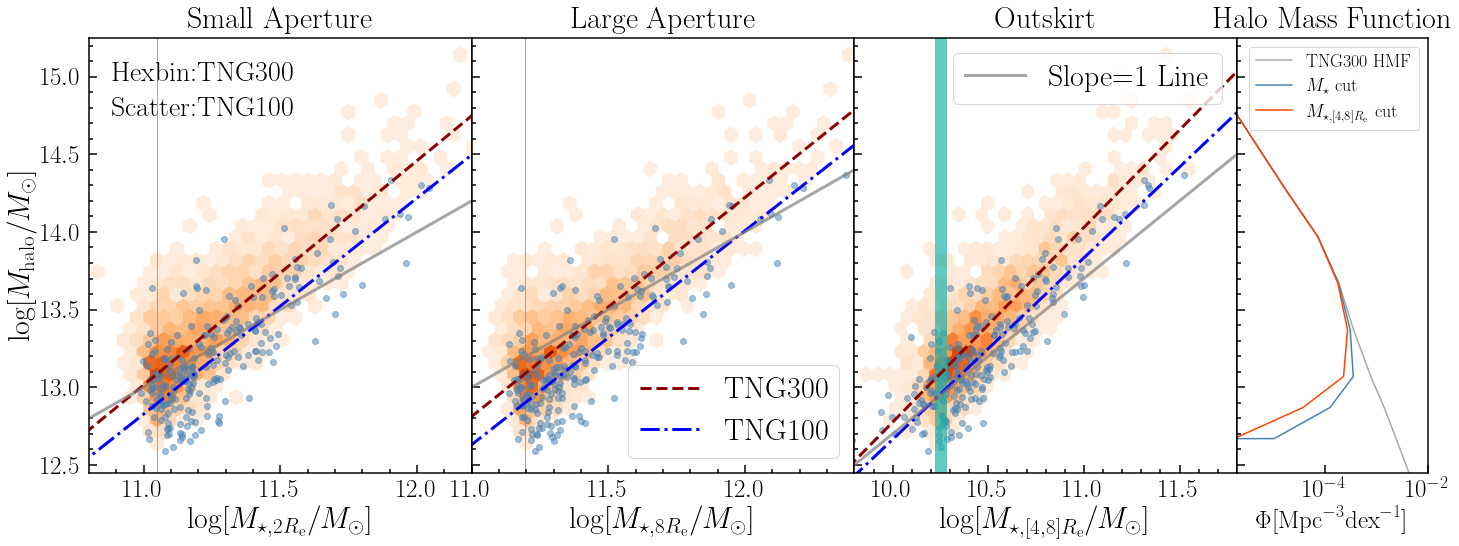

In [41]:
mask=(tab['catsh_primary']==True)&(tab['proj']=='xy')&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
mask1=(tab1['catsh_primary']==True)&(tab1['proj']=='xy')&(tab1['mass_stellar_ins']>1e10)&(tab1['mass_stellar_exs']>10**10.5)
fig=plt.figure(figsize=(24,8))
gs = fig.add_gridspec(1,4, hspace=0, wspace=0,width_ratios=(1,1,1,0.5))
(ax1,ax2,ax3,ax4)= gs.subplots(sharex='col', sharey='row')
linelist=np.asarray([9,10,11,12,13])

ax1.hexbin(np.log10(tab1_r['aper_2reff_gal'][mask1]), np.log10(tab1['mass_halo'][mask1]/h),gridsize=30,cmap=cmap1,mincnt=1,label='TNG300')
k=slope_aper_tab1_r[slope_aper_tab1_r['aperture_size']==2]['slope_aper_gal_xy'][0]
b=inter_aper_tab1_r[inter_aper_tab1_r['aperture_size']==2]['inter_aper_gal_xy'][0]
ax1.plot(linelist, k*linelist+b-np.log10(h),c='darkred',ls='--',lw=3)


ax1.scatter(
    np.log10(tab_r['aper_2reff_gal'][mask]), np.log10(tab['mass_halo'][mask]/h),c='steelblue',alpha=0.5,label='TNG100')
k=slope_aper_tab_r[slope_aper_tab_r['aperture_size']==2]['slope_aper_gal_xy'][0]
b=inter_aper_tab_r[inter_aper_tab_r['aperture_size']==2]['inter_aper_gal_xy'][0]
ax1.plot(linelist, k*linelist+b-np.log10(h),c='blue',ls='-.',lw=3)
ax1.plot([10,11,12,13],[12,13,14,15],c='grey',alpha=0.7,ls='-',lw=3)


ax3.hexbin(np.log10(tab1_r['aper_8reff_gal'][mask1]-tab1_r['aper_4reff_gal'][mask1]), np.log10(tab1['mass_halo'][mask1]/h),gridsize=30,cmap=cmap1,mincnt=1)
k=slope_out_tab1_r[slope_out_tab1_r['outskirt_inner_size']==4]['slope_out_gal_xy'][0]
b=inter_out_tab1_r[inter_out_tab1_r['outskirt_inner_size']==4]['inter_out_gal_xy'][0]
ax3.plot(linelist, k*linelist+b-np.log10(h),c='darkred',ls='--',lw=3)

ax3.scatter(
    np.log10(tab_r['aper_8reff_gal'][mask]-tab_r['aper_4reff_gal'][mask]), np.log10(tab['mass_halo'][mask]/h),c='steelblue',alpha=0.5)
k=slope_out_tab_r[slope_out_tab_r['outskirt_inner_size']==4]['slope_out_gal_xy'][0]
b=inter_out_tab_r[inter_out_tab_r['outskirt_inner_size']==4]['inter_out_gal_xy'][0]
ax3.plot(linelist, k*linelist+b-np.log10(h),c='blue',ls='-.',lw=3)


ax2.hexbin(np.log10(tab1_r['aper_8reff_gal'][mask1]), np.log10(tab1_r['mass_halo'][mask1]/h),gridsize=30,cmap=cmap1,mincnt=1)
k=slope_aper_tab1_r[slope_aper_tab1_r['aperture_size']==8]['slope_aper_gal_xy'][0]
b=inter_aper_tab1_r[inter_aper_tab1_r['aperture_size']==8]['inter_aper_gal_xy'][0]
ax2.plot(linelist, k*linelist+b-np.log10(h),c='darkred',ls='--',lw=3,label=r'\rm TNG300')

ax2.scatter(
    np.log10(tab_r['aper_8reff_gal'][mask]), np.log10(tab_r['mass_halo'][mask]/h),c='steelblue',alpha=0.5)
k=slope_aper_tab_r[slope_aper_tab_r['aperture_size']==8]['slope_aper_gal_xy'][0]
b=inter_aper_tab_r[inter_aper_tab_r['aperture_size']==8]['inter_aper_gal_xy'][0]
ax2.plot(linelist, k*linelist+b-np.log10(h),c='blue',ls='-.',lw=3,label=r'\rm TNG100')

ax2.plot([10,11,12,13],[12,13,14,15],c='grey',ls='-',lw=3,alpha=0.7)
ax3.plot([9,10,11,12,13],[11.7,12.7,13.7,14.7,15.7],c='grey',ls='-',lw=3,alpha=0.7,label=r'\rm Slope=1 Line')

ax3.legend(fontsize=30)
ax2.legend(fontsize=30)

ax1.axvspan(mpeak_aper_tab1_r['mpeak_aper_gal_xy'][mpeak_aper_tab1_r['aperture_size']==2][0],mpeak_aper_tab_r['mpeak_aper_gal_xy'][mpeak_aper_tab_r['aperture_size']==2][0]
            ,color='lightseagreen',ec=None,alpha=0.7)
ax2.axvspan(mpeak_aper_tab1_r['mpeak_aper_gal_xy'][mpeak_aper_tab1_r['aperture_size']==8][0],mpeak_aper_tab_r['mpeak_aper_gal_xy'][mpeak_aper_tab_r['aperture_size']==8][0]
            ,color='lightseagreen',ec=None,alpha=0.7)
ax3.axvspan(mpeak_out_tab_r['mpeak_out_gal_xy'][mpeak_out_tab_r['outskirt_inner_size']==4][0],mpeak_out_tab1_r['mpeak_out_gal_xy'][mpeak_out_tab1_r['outskirt_inner_size']==4][0]
            ,color='lightseagreen',ec=None,alpha=0.7)


ax1.set_title(r'\rm Small Aperture',fontsize=30)
ax2.set_title(r'\rm Large Aperture',fontsize=30)
ax3.set_title(r'\rm Outskirt',fontsize=30)
ax1.text(0.06, 0.90, r'\rm Hexbin:TNG300', transform=ax1.transAxes, size=28)
ax1.text(0.06, 0.82, r'\rm Scatter:TNG100', transform=ax1.transAxes, size=28)

_ = ax1.set_xlim(10.8, 12.2)
_ = ax2.set_xlim(11.0, 12.4)
_ = ax3.set_xlim(9.8, 11.8)
_ = ax1.set_ylim(12.45, 15.25)

_ = ax1.set_xlabel(r'$\log [M_{\star,2R_{\rm e}}/M_\odot]$', fontsize=30)
_ = ax2.set_xlabel(r'$\log [M_{\star,8R_{\rm e}}/M_\odot]$', fontsize=30)
_ = ax3.set_xlabel(r'$\log [M_{\star,[4,8]R_{\rm e}}/M_\odot]$', fontsize=30)
_ = ax1.set_ylabel(r'$\log [M_{\rm halo}/M_\odot]$', fontsize=30)

ax4.plot(phi_0/norm,(binlist[:-1]+0.1)-np.log10(h),c='darkgrey',label=r'\rm TNG300 HMF')
ax4.plot(phi_1/norm,(binlist[:-1]+0.1)-np.log10(h),c='steelblue',label=r'\rm $M_\star$ cut')
ax4.plot(phi_2/norm,(binlist[:-1]+0.1)-np.log10(h),c='orangered',label=r'\rm $M_{\star,[4,8]R_{\rm e}}$ cut')
ax4.set_xscale('log')
ax4.set_title(r'\rm Halo Mass Function',fontsize=30)
ax4.set_xlabel(r'$\Phi[{\rm Mpc}^{-3}{\rm dex}^{-1}]$');
ax4.legend(fontsize=18)


ax4.set_xlim(10**(-5.7),10**(-2))


plt.savefig(fig_dir+"Fig2_r.png",dpi=300)

In [13]:
np.log10(h)

-0.1691548076913885

In [21]:
mpeak_aper_tab1['mpeak_aper_gal_xy'][mpeak_aper_tab1['aperture_size']==30]

11.117066385929308


In [18]:
slope_aper_tab1_r

aperture_size,slope_aper_ins_xy,slope_aper_ins_xy_err,slope_aper_ins_yz,slope_aper_ins_yz_err,slope_aper_ins_xz,slope_aper_ins_xz_err,slope_aper_exs_xy,slope_aper_exs_xy_err,slope_aper_exs_yz,slope_aper_exs_yz_err,slope_aper_exs_xz,slope_aper_exs_xz_err,slope_aper_gal_xy,slope_aper_gal_xy_err,slope_aper_gal_yz,slope_aper_gal_yz_err,slope_aper_gal_xz,slope_aper_gal_xz_err,slope_aper_ins_force_xy,slope_aper_ins_force_xy_err,slope_aper_ins_force_yz,slope_aper_ins_force_yz_err,slope_aper_ins_force_xz,slope_aper_ins_force_xz_err,slope_aper_exs_force_xy,slope_aper_exs_force_xy_err,slope_aper_exs_force_yz,slope_aper_exs_force_yz_err,slope_aper_exs_force_xz,slope_aper_exs_force_xz_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,1.2589571254736953,0.033715677891948514,1.2602078056396988,0.03416240395021147,1.26781621483359,0.03496725554987206,1.2984398209759138,0.02038984003591232,1.2832229941995847,0.01970670510179692,1.2991952144276786,0.020295671527176644,1.44525079693374,0.01851069847979339,1.4469027952878923,0.01961971247407408,1.4551959650039161,0.01861357818892598,1.0256965292926554,0.03528611423071177,1.0394952929548482,0.03431413384748184,1.0396745216148218,0.034940572143684595,1.2244542531918494,0.02270163859691666,1.248357998364452,0.023154115603241,1.3007422723562987,0.02501501156831693
2,1.218814131666562,0.03819702199644883,1.1700774848423106,0.03330233885147234,1.1890270929259121,0.03375018758480596,1.2765603696030763,0.019935060222523854,1.307068156222906,0.021816619855603604,1.2699226946209143,0.019587126123924836,1.4441025351572738,0.019392281683258326,1.4498260731942858,0.01999826710524762,1.4441387657856675,0.019084455888939696,1.1468787568310295,0.033687738382337254,1.1474125981077257,0.03316067674104054,1.1799444438737605,0.04005728294364776,1.2926072290463415,0.024222631105787724,1.2846115493017816,0.02436224018254098,1.2793233482669455,0.023336068656519444
3,1.2509990367185129,0.03652797356113445,1.2342700276756282,0.036464481421654156,1.2447154099927524,0.037276039046572944,1.2760599852472059,0.019891962948058523,1.2460866479487887,0.01893015771276237,1.2497608467714156,0.01883083841375483,1.4391744458057134,0.019616542327196163,1.433383952917916,0.019637581972669287,1.4364435966949434,0.019040715931896466,1.1958260106227383,0.031514041457439294,1.224053097239807,0.035178723020789275,1.209011862921524,0.03258149101072057,1.2150788432601072,0.02062403306184161,1.2714090370550735,0.023629942941367547,1.2415266080582597,0.0214089488722462
4,1.2673474922465822,0.035814560199493826,1.254630288848051,0.03575899171320596,1.2635575369993859,0.036219325449502814,1.2682572491527067,0.019949460998452354,1.238836092313046,0.018667828118607666,1.2864005759005082,0.0205056517258246,1.4207024598782456,0.018671577144191803,1.4231085997618185,0.01930096123066157,1.4353797054282178,0.019764653079144833,1.280134007831914,0.0372256710637655,1.2421653003109132,0.031867590212422386,1.2561813123646908,0.03350614707488447,1.2075980507831439,0.01963543610775164,1.2645881399540253,0.022017810123078293,1.2228856639371986,0.020029406388119314
5,1.2790100936196078,0.0351806254693395,1.2694133923607263,0.035320428036207344,1.2855554718423203,0.035833233822539,1.2675410023576048,0.019905241730444806,1.2382769936338738,0.018523533133824516,1.2808051090527384,0.02018388300373897,1.4131821543414735,0.018214160277381042,1.4123761004397088,0.019103533388297896,1.4234180329561001,0.018802875573059208,1.2742374777837635,0.03367513763666522,1.2703389863164516,0.03299711788155167,1.2834112331936365,0.03434028681225517,1.2617701006549744,0.021440915803761625,1.2243599820942896,0.020024051126648026,1.2670735797625223,0.021553889233027326
8,1.3156820506849933,0.03475933316629168,1.350331669127739,0.0395301459594717,1.3275491789756786,0.03595107916002107